In [112]:
# Loading Data

%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import random


# using the SQLite Table to read data.
con = sqlite3.connect('final.sqlite') 



#filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
cleaned_data = pd.read_sql_query("""
SELECT *
FROM Reviews
""", con) 
#select a random 150 rows 

data_pos = cleaned_data[cleaned_data["Score"]=='positive'].sample(n = 5000, replace = True)
data_neg = cleaned_data[cleaned_data["Score"]=='negative'].sample(n = 5000,replace = True)
final_data = pd.concat([data_pos, data_neg])
cleaned_data['Score'].value_counts()

positive    38479
negative     7592
Name: Score, dtype: int64

In [113]:
# Sorting data based on time
# convert time into understnad time
final_data['Time'] = pd.to_datetime(final_data['Time'], unit = 's')
final_data

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
19448,28879,31493,B001E5DXEU,A28ULUIBFI4W2D,"Jacqueline R. Hill ""Jackie Hill""",1,1,positive,2008-12-02,Yummy chai!,I ordered this brand when I couldn't find my u...,b'order brand couldnt find usual brand quit go...
42245,35337,38429,B005MGDP86,AZ8I261Z95C18,abish84,4,4,positive,2011-10-25,Excellent Salt- Use Sparingly,This salt is very tasty and really adds a nice...,b'salt tasti realli add nice touch dish great ...
5545,21319,23340,B000EPR1J4,A1N064TZSY5JNX,Linda from Indiana,0,0,positive,2011-02-02,Awesome crackers!,"Love'em, love'em, love'em,...these crackers a...",b'loveem loveem loveem cracker inde awesom esp...
24420,43728,47590,B001LO34ZM,AM2V0PVFRPDV6,minmin11,0,0,positive,2012-04-18,This is great product.,I buy this juice often. It taste really good t...,b'buy juic often tast realli good addit make s...
2669,24006,26249,B0007A0PX0,A239D6FZHF13QE,ABC MOM,1,1,positive,2010-06-15,Very convenient!,This is not an instant tea mix. This actually...,b'instant tea mix actual powder green tea leav...
8914,3320,3617,B000HDMW9M,A16K203M0UN38P,G. G. Meisels,0,0,positive,2012-05-14,Tasty lunch or snack,These are better than the usual canned fish fi...,b'better usual can fish filet tastier dri bone...
25205,31536,34340,B001P3NU30,A3G5DSR3NVJJFY,"Z. Abedin ""Z Unit""",0,0,positive,2012-10-25,double duty!,I have a 4yr old 30lb male beagle mix who abso...,b'old male beagl mix absolut love chew origin ...
838,24620,26901,B00014HN0A,A6VKWB820SFZ,J Cat,1,1,positive,2011-05-25,This works as advertised!,I tried this tea when I had given up on wester...,b'tri tea given western medicin need help pms ...
15676,22115,24211,B0013NUGDE,A10B0RPG0JI7AF,TSMUSIC,1,1,positive,2012-07-18,Awesome popchips!,Great product for weight loss help! If you are...,b'great product weight loss help look chip sub...
29739,19503,21263,B002QWP89S,A35GV0E188B3TR,Molly,0,0,positive,2011-11-25,DOG LOVES THEM!,MY DOG LOVES GREENIES! THIS IS A GREAT PRICE!...,b'dog love greeni great price better price pet...


In [114]:
final_data = final_data.sort_values(by='Time')

In [115]:
X = final_data['CleanedText']
print('shape of X:', X.shape)

shape of X: (10000,)


In [116]:
# class label
y = final_data["Score"]
print('shape of y:', y.shape)

shape of y: (10000,)


In [117]:
# split data into train and test where 70% data used to train model and 30% for test
# final_data[:int(len(final_data) * 0.75)], final_data[int(len(final_data) * 0.75):]
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, x_test.shape)

(7000,) (7000,) (3000,)


In [118]:
X_train

43372    b'receiv one banana walnut bar influenst thoug...
16286    b'hard get dog attent outsid hous treat work m...
23873    b'kobe beef come specif prefectur japan illeg ...
12857    b'tasti satisfi ostrich meat protien stick per...
3124     b'like tast dress realiz contain addit mono so...
32090    b'final ive found kibbl full healthi ingredi a...
26359    b'salt great meant cook salt sprinkl food fini...
19415    b'first tri chai tea beach coffe shop vacat go...
43856    b'decid patrick day mani year ive left wrong s...
17163    b'purchas sunflow seed daughter softbal team h...
37516    b'yes probabl healthier energi starbuck shot y...
3235     b'outstand product greattea give warm comfot f...
43951    b'imagin took raspberri drizzl chocol syrup pu...
18742    b'love chia gotten two differ packag brand ran...
30769    b'sorri disappoint husband jelli bean fanat ex...
23097    b'flavor far best flavor avail whether serv ho...
5598     b'three jar came form edibl babi rest fill clu.

In [119]:
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
x_test = np.nan_to_num(x_test)
y_test = np.nan_to_num(y_test)

In [120]:
# Train Vectorizor
from sklearn.feature_extraction.text import CountVectorizer 

bow = CountVectorizer()
X_train = bow.fit_transform(X_train)
X_train

<7000x10247 sparse matrix of type '<class 'numpy.int64'>'
	with 224821 stored elements in Compressed Sparse Row format>

In [121]:
x_test = bow.transform(x_test)
x_test

<3000x10247 sparse matrix of type '<class 'numpy.int64'>'
	with 94847 stored elements in Compressed Sparse Row format>

In [122]:
# 1. import
from sklearn.naive_bayes import MultinomialNB

# 2. instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [123]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [124]:
y_pred = nb.predict(x_test)

In [125]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8466666666666667

In [126]:
from sklearn.model_selection import KFold
def naive_bayes(X_train, y_train):
    
    alpha_values = np.arange(1,100, 0.5)
    
    # empty list that will hold cv scores
    cv_scores = []
    
    for alpha in alpha_values:
        kf = KFold(n_splits=5)
        sum = 0
        for train_index, test_index in kf.split(X_train):
            Xfold_train, Xfold_test = X_train[train_index], X_train[test_index]
            yfold_train, yfold_test = y_train[train_index], y_train[test_index]
            nb = MultinomialNB(alpha=alpha)
            nb.fit(Xfold_train, yfold_train)
            y_pred = nb.predict(Xfold_test)
            sum += metrics.accuracy_score(yfold_test, y_pred)
            
        average = sum / 10
        cv_scores.append(average)
    #print(cv_scores)    
    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]
    #print(MSE)
    # optimal alpha 
    optimal_alpha = alpha_values[MSE.index(min(MSE))]
    plt.plot(alpha_values, MSE)
    plt.title("Misclassification Error vs alpha")
    plt.xlabel('alpha values')
    plt.ylabel('Misclassifcation error')
    plt.show()
    #print(optimal_alpha)
    return optimal_alpha


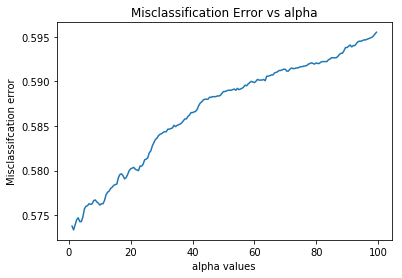

1.5

In [127]:
# to choose optimal alpha
optimal_alpha = naive_bayes(X_train, y_train)
optimal_alpha

In [139]:
nb = MultinomialNB(alpha=optimal_alpha)
nb.fit(X_train, y_train)
y_pred = nb.predict(x_test)
#Accuracy on test data set
print("Test accuracy", metrics.accuracy_score(y_test, y_pred))
# Accuracy on train data
train_acc_bow = nb.score(X_train, y_train)
print("Train accuracy", train_acc_bow)

Test accuracy 0.85
Train accuracy 0.9105714285714286


In [140]:
# Observation- accuracy of the test data set is not more from without cv in naive bayes using BOW

In [141]:
# To get all features name
bow_features = bow.get_feature_names()

In [142]:
# count features for each class while fitting the model
feat_count = nb.feature_count_
feat_count.shape

(2, 10247)

In [143]:
## Number of samples encountered for each class during fitting
nb.class_count_

array([3490., 3510.])

In [144]:
# Empirical log probability of features given a class(i.e. P(x_i|y))

log_prob = nb.feature_log_prob_
log_prob

array([[-11.58768965, -11.07686403, -10.74039179, ..., -11.07686403,
        -11.58768965, -11.58768965],
       [-10.63769099, -10.63769099, -11.48498885, ..., -11.48498885,
        -10.97416322, -10.97416322]])

In [145]:
feature_prob = pd.DataFrame(log_prob, columns=bow_features)
feature_prob_tr = feature_prob.T
feature_prob_tr.shape

(10247, 2)

In [146]:
# show top10 features from both class
#feature Importance

print("Top 10 Negative Features:-\n",feature_prob_tr[0].sort_values(ascending=False)[0:10])

print("Top 10 Negative Features:-\n",feature_prob_tr[1].sort_values(ascending=False)[0:10])

Top 10 Negative Features:-
 tast      -4.266722
like      -4.307222
product   -4.585534
one       -4.869079
flavor    -4.904329
would     -4.946072
tri       -4.983294
good      -5.153143
get       -5.179161
buy       -5.213801
Name: 0, dtype: float64
Top 10 Negative Features:-
 like     -4.416533
tast     -4.612861
love     -4.708482
flavor   -4.750397
one      -4.755165
great    -4.781801
good     -4.789190
use      -4.943959
tri      -4.967318
coffe    -4.997305
Name: 1, dtype: float64


In [147]:
# Observation :- most of features are common in both class

In [148]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1259,  251],
       [ 199, 1291]])

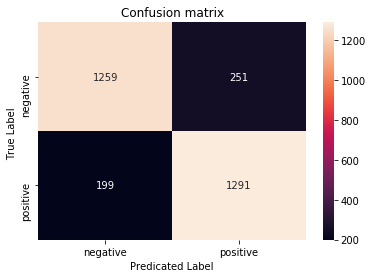

In [149]:
#plot confusion matrix to describe the performance of classifier
import seaborn as sns
class_label = ['negative', 'positive']
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion matrix")
plt.xlabel("Predicated Label")
plt.ylabel("True Label ")
plt.show()

In [151]:
# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.83      0.85      1510
    positive       0.84      0.87      0.85      1490

   micro avg       0.85      0.85      0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



In [152]:
#Observtion

In [158]:
#TF-IDF

# split data into train and test where 70% data used to train model and 30% for test
# final_data[:int(len(final_data) * 0.75)], final_data[int(len(final_data) * 0.75):]
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
x_test = np.nan_to_num(x_test)
y_test = np.nan_to_num(y_test)
tf_idf_vect = TfidfVectorizer(ngram_range=(1, 2))
X_train = tf_idf_vect.fit_transform(X_train)
X_train

<7000x161899 sparse matrix of type '<class 'numpy.float64'>'
	with 488300 stored elements in Compressed Sparse Row format>

In [159]:
x_test = tf_idf_vect.transform(x_test)
x_test.shape

(3000, 161899)

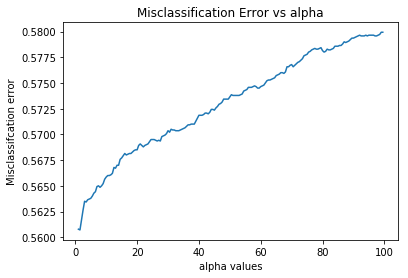

1.5

In [160]:
# to choosing best alpha
optimal_alpha = naive_bayes(X_train, y_train)
optimal_alpha

In [165]:
nb = MultinomialNB(alpha=optimal_alpha)
nb.fit(X_train, y_train)
y_pred = nb.predict(x_test)
#Accuracy on test data set
print("Test accuracy", metrics.accuracy_score(y_test, y_pred))
# Accuracy on train data
train_acc_tfidf = nb.score(X_train, y_train)
print("Train accuracy", train_acc_tfidf)

Test accuracy 0.884
Train accuracy 0.987


In [166]:
# Observation - Naive Bayes using TF-IDF give a more accuracy insted of BOW
# This also give a more accuracy of traing data set and test datasets
# optimal alpha values are samme in both so we can say that this model is good for classification 

In [167]:
# To get all fetaures name
tfidf_features = tf_idf_vect.get_feature_names()

In [169]:
feat_count = nb.feature_count_
feat_count.shape

(2, 161899)

In [171]:
# Number of samples encountered for each class during fitting

nb.class_count_

array([3490., 3510.])

In [172]:
# Empirical log probability of features given a class(i.e. P(x_i|y))

log_prob = nb.feature_log_prob_
log_prob

array([[-12.09680035, -12.09680035, -12.04526976, ..., -12.09680035,
        -12.09680035, -12.09680035],
       [-12.05456778, -12.05456778, -11.93974082, ..., -12.03055855,
        -11.98578353, -11.98578353]])

In [173]:
feature_prob = pd.DataFrame(log_prob, columns = tfidf_features)
feature_prob_tr = feature_prob.T
feature_prob_tr.shape

(161899, 2)

In [174]:
# To show top 10 feature from both class
print("Top 10 negative features:-\n",feature_prob_tr[0].sort_values(ascending = False)[0:10])
print("\n\n Top 10 positive features:-\n",feature_prob_tr[1].sort_values(ascending = False)[0:10])

Top 10 negative features:-
 tast      -8.126191
like      -8.241993
product   -8.370578
flavor    -8.638463
would     -8.672056
one       -8.717512
tri       -8.743603
coffe     -8.763389
buy       -8.779929
tea       -8.840140
Name: 0, dtype: float64


 Top 10 positive features:-
 love     -8.304644
great    -8.320495
like     -8.443661
coffe    -8.470186
good     -8.491430
flavor   -8.527943
tast     -8.529255
tea      -8.573317
one      -8.631079
use      -8.716509
Name: 1, dtype: float64


In [175]:
#from sklearn.matrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1374,  136],
       [ 212, 1278]])

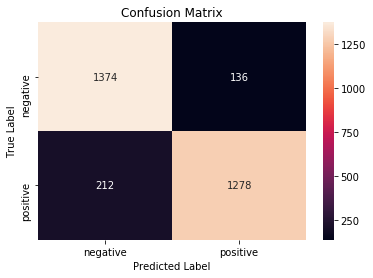

In [176]:
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.87      0.91      0.89      1510
    positive       0.90      0.86      0.88      1490

   micro avg       0.88      0.88      0.88      3000
   macro avg       0.89      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



In [180]:
'''Conclusions -
1.Naive bayes are good for classification task like sentimental analysis, spam filtering etc.
2.Overall both of the models are performing well on unseen data.
3. Naive bayes give abest result compared to the KNN
'''


'Conclusions -\n1.Naive bayes are good for classification task like sentimental analysis, spam filtering etc.\n2.Overall both of the models are performing well on unseen data.\n3. Naive bayes give abest result compared to the KNN\n'